In [17]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    #fit() method는 아무것도 학습하지 않음 어디까지나 Dummy
    def fit(self, X, y=None):
        pass
    # predict() method는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            pred = np.zeros((X.shape[0],1))
            for i in range(X.shape[0]):
                if X['Sex'].iloc[i]==1:
                    pred[i]=0
                else:
                    pred[i]=1
        return pred

In [18]:
from sklearn import preprocessing

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

##머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

##labelencoding 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
        
    return df


##앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing

titanic_df=pd.read_csv('./data/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df, test_size=0.2,random_state=0)
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)
mypredictions=myclf.predict(X_test)
print(accuracy_score(y_test,mypredictions))

0.7877094972067039


In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    
digits=load_digits()

y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data,y,random_state=11)

In [23]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print(accuracy_score(y_test,fakepred))

(450,)
0    405
1     45
dtype: int64
0.9


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print(confusion)
    print(accuracy)
    print(precision)
    print(recall)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 data 재로딩, 데이터 가공, 학습 데이터/테스트 분할
titanic_df=pd.read_csv('./data/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.20,random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
pred_proba = lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print(pred_proba_result[:3])

(179, 2)
[[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
[[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


In [30]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [33]:
#Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393


In [34]:
#Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.4

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

[[99 19]
 [10 51]]
0.8379888268156425
0.7285714285714285
0.8360655737704918


In [35]:
#Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.2

#predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

[[75 43]
 [ 6 55]]
0.7262569832402235
0.5612244897959183
0.9016393442622951


In [37]:
threshold=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(custom_threshold)
        get_clf_eval(y_test,custom_predict)
        

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),threshold)

0.4
[[99 19]
 [10 51]]
0.8379888268156425
0.7285714285714285
0.8360655737704918
0.45
[[103  15]
 [ 12  49]]
0.8491620111731844
0.765625
0.8032786885245902
0.5
[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393
0.55
[[109   9]
 [ 15  46]]
0.8659217877094972
0.8363636363636363
0.7540983606557377
0.6
[[112   6]
 [ 16  45]]
0.8770949720670391
0.8823529411764706
0.7377049180327869


In [39]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index= np.arange(0,thresholds.shape[0],15)
print(thr_index)
print(np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print(np.round(precisions[thr_index],3))
print(np.round(recalls[thr_index],3))

(143,)
[  0  15  30  45  60  75  90 105 120 135]
[0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
[0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
[1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


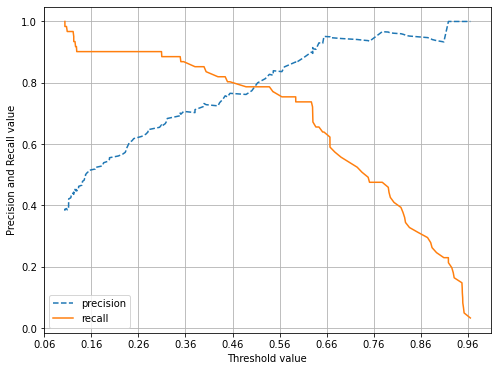

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 X 축의 scale을 0.1단위로 변경
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [42]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print(f1)

0.7804878048780488


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print(confusion)
    print(accuracy)
    print(precision)
    print(recall)
    f1=f1_score(y_test,pred)
    print(f1)

    

In [44]:
threshold=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(custom_threshold)
        get_clf_eval(y_test,custom_predict)
        

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),threshold)

0.4
[[99 19]
 [10 51]]
0.8379888268156425
0.7285714285714285
0.8360655737704918
0.7786259541984734
0.45
[[103  15]
 [ 12  49]]
0.8491620111731844
0.765625
0.8032786885245902
0.784
0.5
[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393
0.7804878048780488
0.55
[[109   9]
 [ 15  46]]
0.8659217877094972
0.8363636363636363
0.7540983606557377
0.793103448275862
0.6
[[112   6]
 [ 16  45]]
0.8770949720670391
0.8823529411764706
0.7377049180327869
0.8035714285714285


In [45]:
from sklearn.metrics import roc_curve

#레이블이 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
#반환된 임계값 배열에서 sample로 data를 추출하되, 임계값을 5step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)
print(thr_index)
print(np.round(thresholds[thr_index],2))

#5step에 따른 fpr, TPR 값
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[ 1  6 11 16 21 26 31 36 41 46 51]
[0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
[0.   0.02 0.03 0.08 0.13 0.19 0.24 0.58 0.62 0.75 0.81]
[0.03 0.64 0.7  0.75 0.8  0.85 0.9  0.9  0.95 0.97 1.  ]


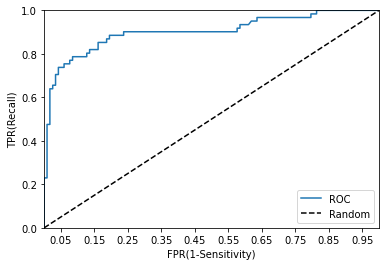

In [46]:
def roc_curve_plot(y_test,pred_proba_c1):
    #임계값에 따른 fpr,tpr 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR x축의 scale을 0.1 단위로 변경, x,y축 명 설정
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1) ; plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)') ; plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [47]:
from sklearn.metrics import roc_auc_score
import numpy as np

In [48]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred=None,pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print(f'오차행렬은 {confusion}')
    print(f'정확도는 {accuracy}')
    print(f'정밀도는 {precision}')
    print(f'재현율은 {recall}')
    f1=f1_score(y_test,pred)
    print(f'f1 score는{f1}')
    roc_auc = roc_auc_score(y_test,pred_proba)
    print(f'roc auc score는 {roc_auc}')

In [50]:
get_clf_eval(y_test,pred)

[[104  14]
 [ 13  48]]
0.8491620111731844
0.7741935483870968
0.7868852459016393
0.7804878048780488
0.8341205890525146
